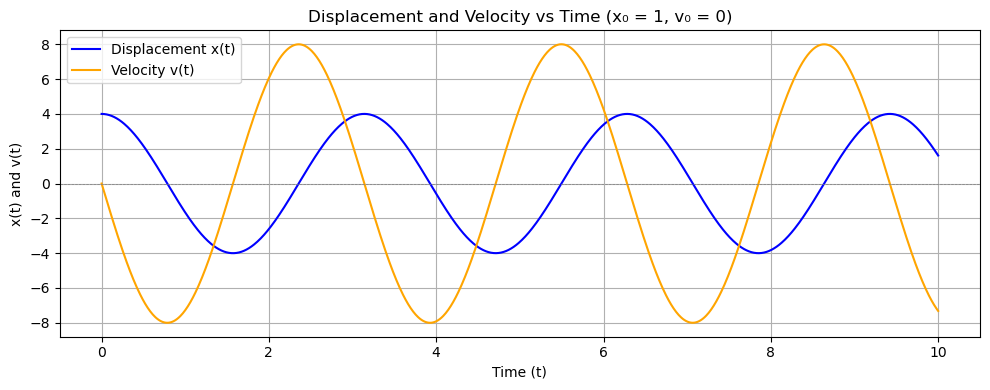

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ----------------------------
# Parameters for SHM
# ----------------------------
A = 4.0                  # Initial amplitude
omega = 2     # Angular frequency (1 Hz)
t_span = (0, 10)          # Time interval
t_eval = np.linspace(*t_span, 1000)

# ----------------------------
# Define the SHM system
# ----------------------------
def shm_system(t, Y):
    x, v = Y
    dxdt = v
    dvdt = -omega**2 * x
    return [dxdt, dvdt]

# ----------------------------
# Initial conditions: x = 1, v = 0
# ----------------------------
initial_conditions = [4.0, 0.0]
sol = solve_ivp(shm_system, t_span, initial_conditions, t_eval=t_eval)
x = sol.y[0]
v = sol.y[1]
t = sol.t

# ----------------------------
# Plot x(t) and v(t)
# ----------------------------
plt.figure(figsize=(10, 4))
plt.plot(t, x, label="Displacement x(t)", color="blue")
plt.plot(t, v, label="Velocity v(t)", color="orange")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Displacement and Velocity vs Time (x₀ = 1, v₀ = 0)")
plt.xlabel("Time (t)")
plt.ylabel("x(t) and v(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

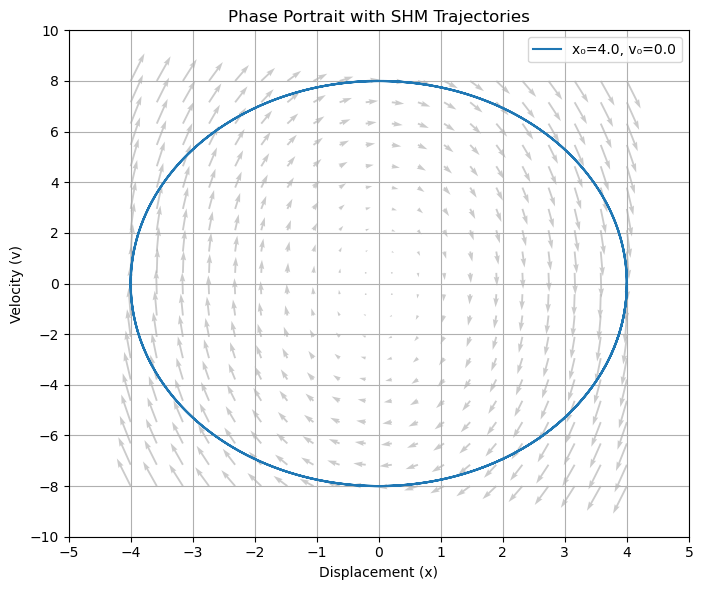

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ----------------------------
# System Parameters
# ----------------------------
omega_0 = 2.0          # Natural angular frequency
amplitude = 4.0        # Maximum displacement for plotting
n_points = 20          # Grid resolution for vector field
t_span = (0, 10)       # Time span for integration
t_eval = np.linspace(*t_span, 500)

# ----------------------------
# Define the SHM system: dx/dt = v, dv/dt = -ω₀² x
# ----------------------------
def shm_system(t, Y):
    x, v = Y
    dxdt = v
    dvdt = -omega_0**2 * x
    return [dxdt, dvdt]

# ----------------------------
# Initial Conditions for Trajectories
# ----------------------------
initial_conditions = [
    (4.0, 0.0),    # Max displacement
]

# ----------------------------
# Vector Field for Phase Portrait
# ----------------------------
x_phase = np.linspace(-amplitude, amplitude, n_points)
v_phase = np.linspace(-amplitude * omega_0, amplitude * omega_0, n_points)
X, V = np.meshgrid(x_phase, v_phase)
dXdt = V
dVdt = -omega_0**2 * X

# ----------------------------
# Plot the Phase Portrait
# ----------------------------
plt.figure(figsize=(7, 6))

# Draw the vector field
plt.quiver(X, V, dXdt, dVdt, color='darkgray', alpha=0.6)

# Plot trajectories for each initial condition
for x0, v0 in initial_conditions:
    sol = solve_ivp(shm_system, t_span, [x0, v0], t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'x₀={x0}, v₀={v0}')

# Labels and appearance
plt.title("Phase Portrait with SHM Trajectories")
plt.xlabel("Displacement (x)")
plt.ylabel("Velocity (v)")
#plt.axis("equal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(-5, 5)
plt.ylim(-10, 10)
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-10, 11, 2))
plt.show()

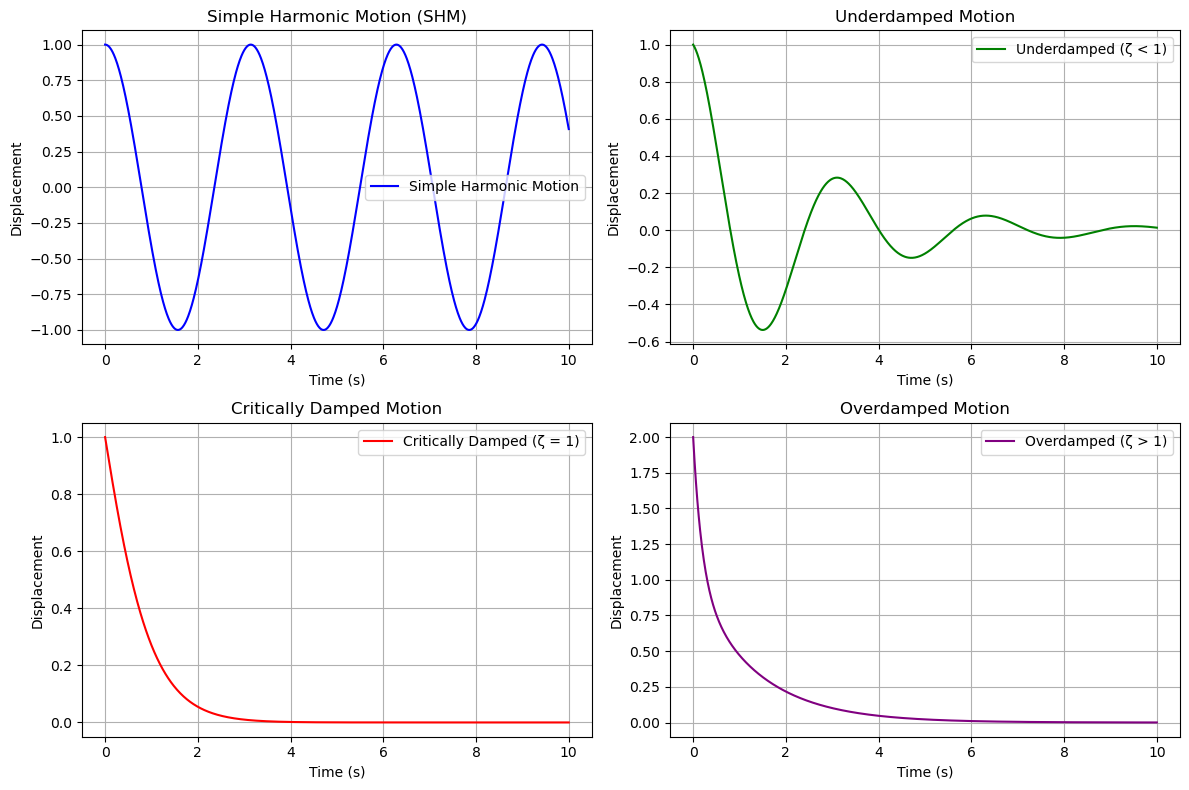

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Time array
t = np.linspace(0, 10, 1000)

# Parameters
A = 1        # Amplitude
omega_0 = 2  # Natural frequency

# SHM (Simple Harmonic Motion)
x_shm = A * np.cos(omega_0 * t)

# Underdamped Motion (ζ < 1)
zeta_under = 0.2
omega_d = omega_0 * np.sqrt(1 - zeta_under**2)
x_underdamped = A * np.exp(-zeta_under * omega_0 * t) * np.cos(omega_d * t)

# Critically Damped Motion (ζ = 1)
x_critical = (A + A * t) * np.exp(-omega_0 * t)

# Overdamped Motion (ζ > 1)
zeta_over = 1.5
r1 = -zeta_over * omega_0 + omega_0 * np.sqrt(zeta_over**2 - 1)
r2 = -zeta_over * omega_0 - omega_0 * np.sqrt(zeta_over**2 - 1)
x_overdamped = A * np.exp(r1 * t) + A * np.exp(r2 * t)

# Plot the results
plt.figure(figsize=(12, 8))

# SHM
plt.subplot(2, 2, 1)
plt.plot(t, x_shm, label="Simple Harmonic Motion", color='b')
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.title("Simple Harmonic Motion (SHM)")
plt.grid()
plt.legend()

# Underdamped
plt.subplot(2, 2, 2)
plt.plot(t, x_underdamped, label="Underdamped (ζ < 1)", color='g')
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.title("Underdamped Motion")
plt.grid()
plt.legend()

# Critically Damped
plt.subplot(2, 2, 3)
plt.plot(t, x_critical, label="Critically Damped (ζ = 1)", color='r')
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.title("Critically Damped Motion")
plt.grid()
plt.legend()

# Overdamped
plt.subplot(2, 2, 4)
plt.plot(t, x_overdamped, label="Overdamped (ζ > 1)", color='purple')
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.title("Overdamped Motion")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


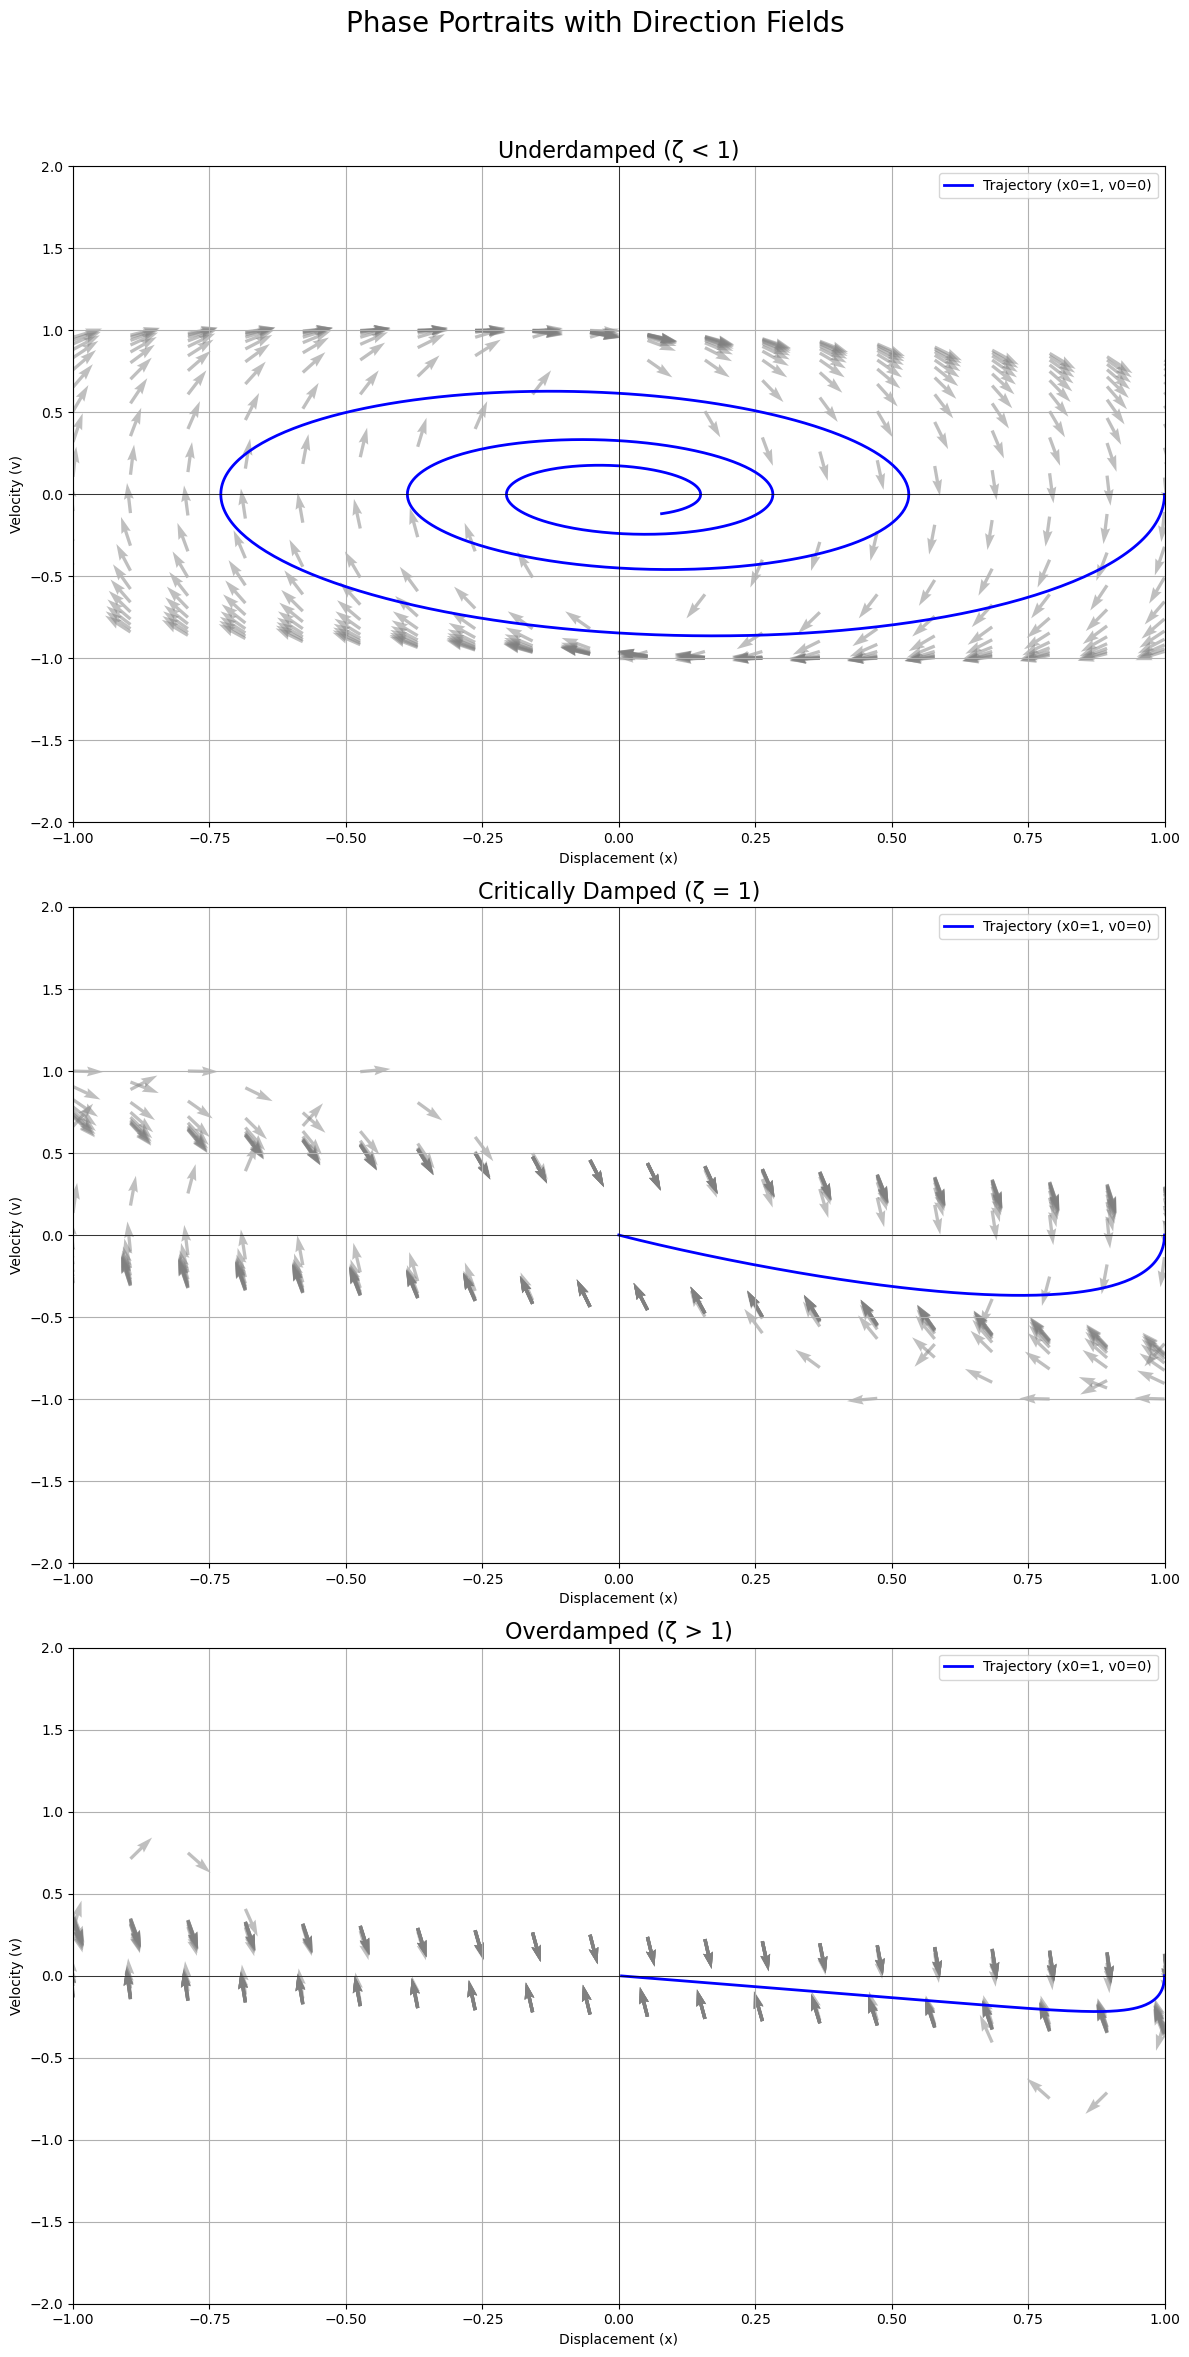

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System parameters
m = 1.0
k = 1.0
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)
initial_condition = [1, 0]

cases = {
    "Underdamped (ζ < 1)": 0.2,
    "Critically Damped (ζ = 1)": 2.0,
    "Overdamped (ζ > 1)": 4.0
}

# Grid for direction field
x_vals = np.linspace(-1, 1, 20)
v_vals = np.linspace(-2, 2, 20)
X, V = np.meshgrid(x_vals, v_vals)

# Taller figure (2x height per plot)
fig, axs = plt.subplots(len(cases), 1, figsize=(12, 24))
fig.suptitle("Phase Portraits with Direction Fields", fontsize=20)

for ax, (title, c) in zip(axs, cases.items()):
    def damped_oscillator(t, y):
        x, v = y
        dxdt = v
        dvdt = -(c / m) * v - (k / m) * x
        return [dxdt, dvdt]

    # Solve ODE
    sol = solve_ivp(damped_oscillator, t_span, initial_condition, t_eval=t_eval)

    # Direction field vectors
    DX = V
    DV = -(c / m) * V - (k / m) * X
    mag = np.hypot(DX, DV)
    DX /= mag
    DV /= mag

    # Quiver plot (direction field)
    ax.quiver(X, V, DX, DV, color='gray', alpha=0.5)

    # Trajectory
    ax.plot(sol.y[0], sol.y[1], color='blue', lw=2, label="Trajectory (x0=1, v0=0)")

    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Displacement (x)")
    ax.set_ylabel("Velocity (v)")
    ax.grid(True)
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-2, 2)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()